Name: Tanaya Pawar Netid : tp2623

Data Science Bootcamp assignment 3

1. ⁠Filter the data to include only weekdays (Monday to Friday) and plot a line graph showing the pedestrian counts for each day of the week.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime

In [2]:
url = "https://data.cityofnewyork.us/api/views/6fi9-q3ta/rows.csv?accessType=DOWNLOAD"

df = pd.read_csv(url)
df['hour_beginning'] = pd.to_datetime(df['hour_beginning'])
df['day_of_week'] = df['hour_beginning'].dt.day_name()

weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
weekday_data = df[df['day_of_week'].isin(weekdays)]

/var/folders/dy/xbnq_zhd5rb1cqngr6g12tkc0000gn/T/ipykernel_93698/4182447551.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['hour_beginning'] = pd.to_datetime(df['hour_beginning'])


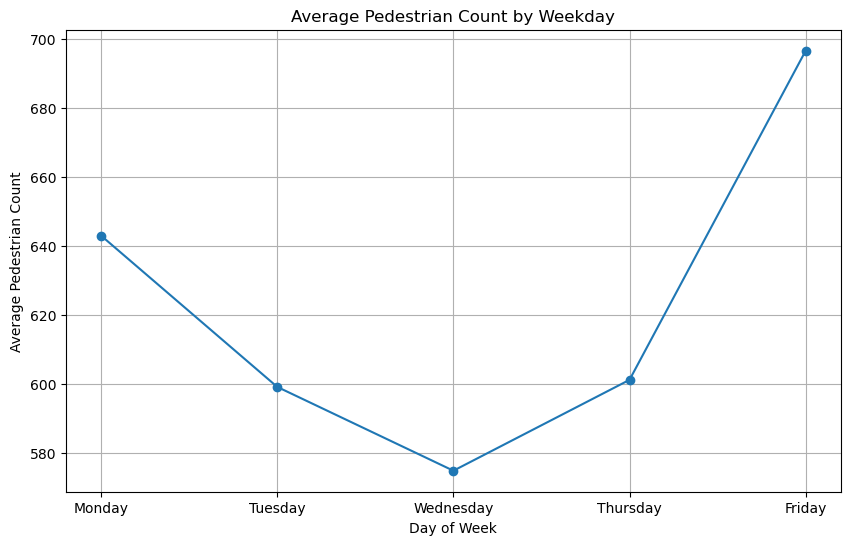

In [3]:
avg_pedestrians = weekday_data.groupby('day_of_week')['Pedestrians'].mean().reindex(weekdays)
plt.figure(figsize=(10, 6))
plt.plot(avg_pedestrians.index, avg_pedestrians.values, marker='o')
plt.title('Average Pedestrian Count by Weekday')
plt.xlabel('Day of Week')
plt.ylabel('Average Pedestrian Count')
plt.grid(True)
plt.show()


2. Track pedestrian counts on the Brooklyn Bridge for the year 2019 and analyze how different weather conditions influence pedestrian activity in that year. Sort the pedestrian count data by weather summary to identify any correlations( with a correlation matrix) between weather patterns and pedestrian counts for the selected year.

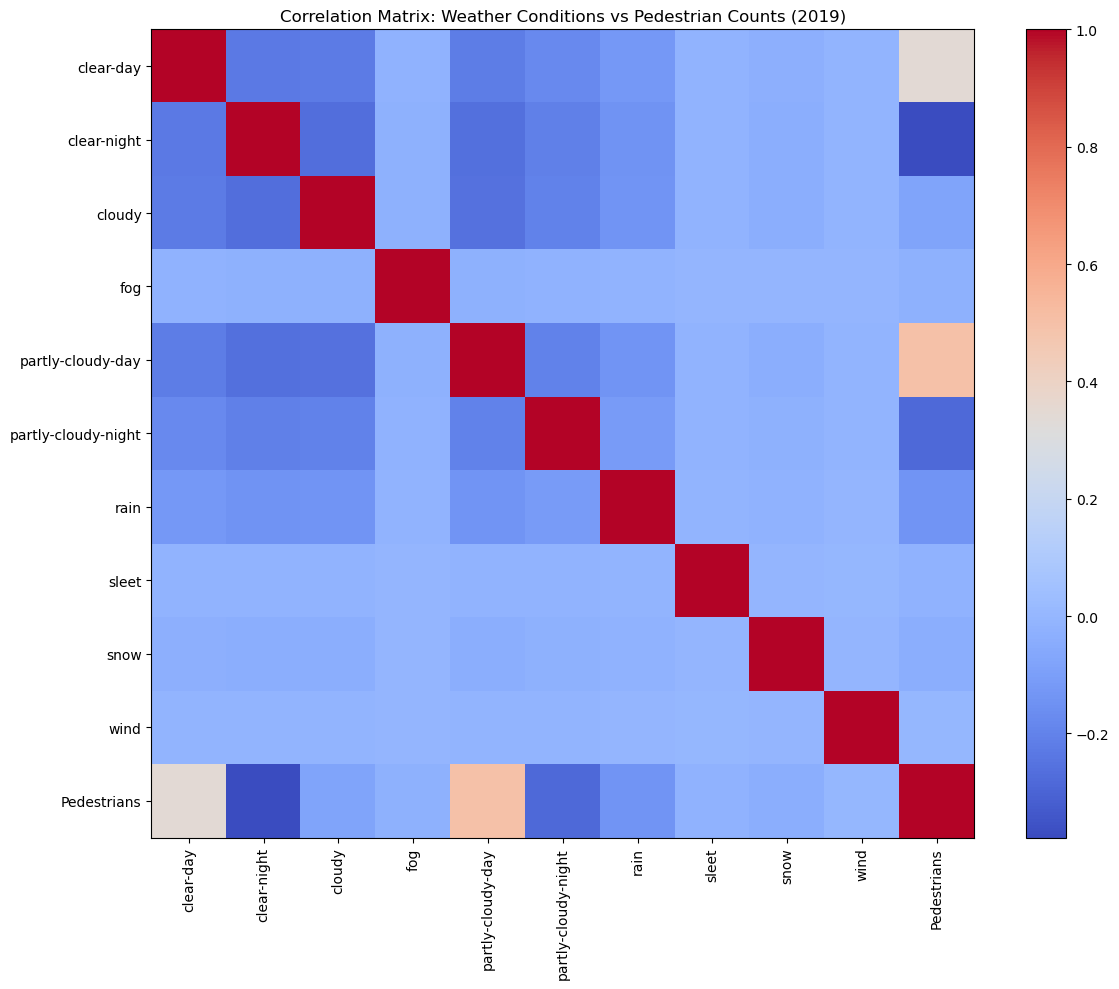

In [5]:
df_2019 = df[df['hour_beginning'].dt.year == 2019]
weather_encoded = pd.get_dummies(df_2019['weather_summary'])
weather_pedestrians = pd.concat([weather_encoded, df_2019['Pedestrians']], axis=1)
correlation_matrix = weather_pedestrians.corr()
plt.figure(figsize=(12, 10))
plt.imshow(correlation_matrix, cmap='coolwarm', aspect='auto')
plt.colorbar()
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.title('Correlation Matrix: Weather Conditions vs Pedestrian Counts (2019)')
plt.tight_layout()
plt.show()

⁠3. Implement a custom function to categorize time of day into morning, afternoon, evening, and night, and create a new column in the DataFrame to store these categories. Use this new column to analyze pedestrian activity patterns throughout the day.

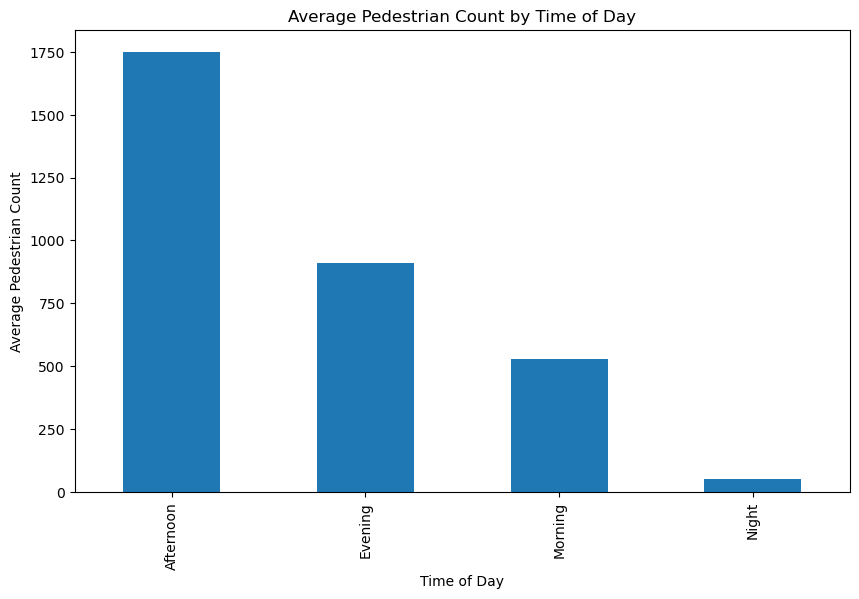

In [7]:
def categorize_time(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

df['time_category'] = df['hour_beginning'].dt.hour.apply(categorize_time)
time_patterns = df.groupby('time_category')['Pedestrians'].mean().sort_values(ascending=False)


plt.figure(figsize=(10, 6))
time_patterns.plot(kind='bar')
plt.title('Average Pedestrian Count by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Average Pedestrian Count')
plt.show()
